<a href="https://colab.research.google.com/github/arminarj/Reinforcement-learning/blob/master/FrozenLake_Qlearning_SARSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Frozen Lake 8*8

Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend.

The surface is described using a grid like the following:

SFFF       (S: starting point, safe)

FHFH       (F: frozen surface, safe)

FFFH       (H: hole, fall to your doom)

HFFG       (G: goal, where the frisbee is located)


The episode ends when you reach the goal or fall in a hole. You receive a reward of 100 if you reach the goal, -100 if you fall into the hole, and -0.1 for each step you take.

### Getting Started

Run the following code and observe the result.

In [1]:
%run FrozenLake.ipynb

env = FrozenLakeEnv()
env.reset()

for _ in range(10):
    # env.render()
    state, reward, done, info = env.step(env.action_space.sample()) # Take a random action
    
env.close()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG


What are the action space and the state space?

In [2]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(64)


### Q-Learning

Find the best policy using the Q-Learning algorithm.

Use an epsilon-greedy policy with decaying epsilon.

### Tunining :
for the enviroment of this game I've tuned the Alfa and Gamma that reaches the **shortest** and **safest** path that makes the agent reach the goal as many as it can. 
i've plotted the histogram of reaching the goal and holes, if we run the agent after learning the best Q-table it can reach the best resualts with this tunning .

In [3]:
%run FrozenLake.ipynb

env = FrozenLakeEnv()
env.reset()


## Fine Tune :
# alfa = 0.1 gamma =0.20, epsilon =0.30

class Q_learning():
    
    def __init__(self, learning_rate=0.1, gamma=0.20, epsilon=0.30,
                 max_steps=100, episode_number=10000):
        self.Q = np.zeros((env.observation_space.n, env.action_space.n))
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.max_steps = max_steps
        self.episode_number = episode_number
        self.total_reward = 0
    
    def update_Q(self, state, new_state, reward, action):
        self.total_reward += reward
        predict = self.Q[state, action]
        target = reward + self.gamma * np.max(self.Q[new_state, :])
        self.Q[state, action] = self.Q[state, action] + self.learning_rate * (target - predict)
    
    
    def policy(self, state):
        action=0
        if np.random.uniform(0, 1) < self.epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(self.Q[state, :])
        return action

    def update_exploration(self):
        self.epsilon -= self.epsilon * 0.01
        self.learning_rate -= self.learning_rate * 0.001


agent =  Q_learning()
done_list = []
t_list = []
for episode in range(agent.episode_number):
    
    agent.update_exploration()
    state = env.reset()
    t = 0
    while t < agent.max_steps:
        choosed_action = agent.policy(state)  
        new_state, reward, done, _ = env.step(choosed_action)  
        agent.update_Q(state, new_state, reward, choosed_action)
        state = new_state
        t += 1
        if done:
            if reward > 0 :
                t_list.append(t)
            done_list.append(reward)
            break
        if t == agent.max_steps:
            done_list.append(reward)
        
# print(agent.Q)
# env.render()
env.close()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG


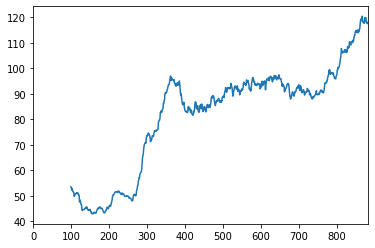

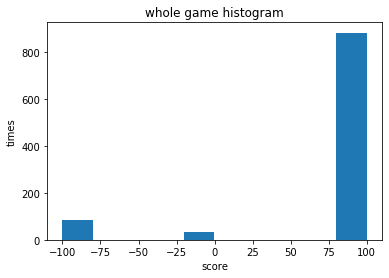

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

t1_list = pd.DataFrame(t_list)
t1_list = t1_list.rolling(100).mean().reset_index()
t1_list[0].plot()
plt.figure()
plt.hist(done_list)
plt.title('whole game histogram')
plt.xlabel('score')
plt.ylabel('times')
plt.show()


Print what the best action in each state is.

In [5]:
best = []
for state in range(64):
    best.append(np.argmax(agent.Q[state, :]))
    if state % 8 == 0 :
        print best
        best = []

SyntaxError: ignored

Run your agent for one episode while acting greedy with respect to the learned policy.

Show your result and print the total reward that your agent has received.

In [0]:
done_list = []
t_list = []
for episode in range(1):
    
    agent.update_exploration()
    state = env.reset()
    t = 0
    while t < agent.max_steps:
        choosed_action = agent.policy(state)  
        new_state, reward, done, _ = env.step(choosed_action)  
        agent.update_Q(state, new_state, reward, choosed_action)
        state = new_state
        t += 1
        if done:
            if reward > 0 :
                t_list.append(t)
            print(reward)
            done_list.append(reward)
            break
        if t == agent.max_steps:
            done_list.append(reward)

env.close()



99.9


### SARSA

Find the best policy using the SARSA algorithm.

Use an epsilon-greedy policy with decaying epsilon.

In [48]:
%run FrozenLake.ipynb

env = FrozenLakeEnv()
_  = env.reset()


## best tune : earning_rate=0.9, gamma=0.7, epsilon=0.3
class SARSA():
    
    def __init__(self, learning_rate=0.95, gamma=0.6, epsilon=0.3,
                 max_steps=300, episode_number=1):
        self.Q = np.zeros((env.observation_space.n, env.action_space.n))
        self.number_state = env.observation_space.n
        self.number_action = env.action_space.n
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.max_steps = max_steps
        self.episode_number = episode_number
    
    def update_Q(self, state, new_state, reward, action, new_action):
        '''
        SARSA Q(s,a) updating,
        target : reward + Q(s', a')
        predict : Q(s,a)
        '''
        predict = self.Q[state, action]
        target = reward + self.gamma * (self.Q[new_state, new_action])
        self.Q[state, action] = self.Q[state, action] + self.learning_rate * (target - predict)
    
    
    def policy(self, state):
        '''
        Sof-eps policy :
        1 - eps + eps/(number of actions) for argmax()
        eps/(number of actions) for exploration of other actions
        '''
        action=0
        self.update_exploration()
        if np.random.uniform(0, 1) < self.epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(self.Q[state, :])
        return action
    
    def update_exploration(self):
        self.epsilon -= self.epsilon * 0.01
        self.learning_rate -= self.learning_rate * 0

    def best_action(self):
        best_action = np.argmax(self.Q, axis=1)
        for index, action in enumerate(best_action):
            if index % 8 == 0 :
                print()
            print(action, end =" ")


        


agent =  SARSA()
done_list = []
t_list = []
    
t = 0

for episod in range(1000):
    agent.update_exploration()
    state = env.reset()
    done = False
    t = 0
    while t < agent.max_steps:
        choosed_action = agent.policy(state)
        new_state, reward, done, _ = env.step(choosed_action)
        new_action = agent.policy(new_state)
        agent.update_Q(state, new_state, reward, choosed_action, new_action)
        state = new_state
        choosed_action = new_action 
        t += 1
        if done:
            if reward > 0 :
                t_list.append(t)
            done_list.append(reward)
            break
        if t == agent.max_steps:
                done_list.append(reward)
        
        
env.close()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG


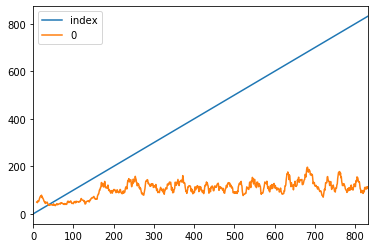

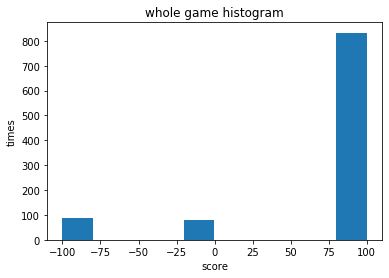

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

t1_list = pd.DataFrame(t_list)
t1_list = t1_list.rolling(10).mean().reset_index()
t1_list.plot()
plt.figure()
plt.hist(done_list)
plt.title('whole game histogram')
plt.xlabel('score')
plt.ylabel('times')
plt.show()


Print what the best action in each state is.

In [50]:
agent.best_action()


2 2 2 2 2 1 2 1 
2 3 3 3 3 3 3 1 
0 3 0 0 2 3 0 2 
0 0 2 2 0 0 2 2 
0 0 3 0 2 1 3 2 
0 0 0 2 3 0 0 2 
0 0 2 0 0 1 0 2 
0 1 0 0 3 0 0 0 